In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("pkolhapur.csv")


In [4]:
X = df.drop(["PRECTOTCORR", "HR","DY","MO","YEAR","RH2M","WS50M","WD50M"], axis=1)
Y = df["PRECTOTCORR"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [6]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.63878215, 0.13933833])

In [7]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


Unnamed: 0    0.638782
T2M           0.139338
dtype: float64

<AxesSubplot:>

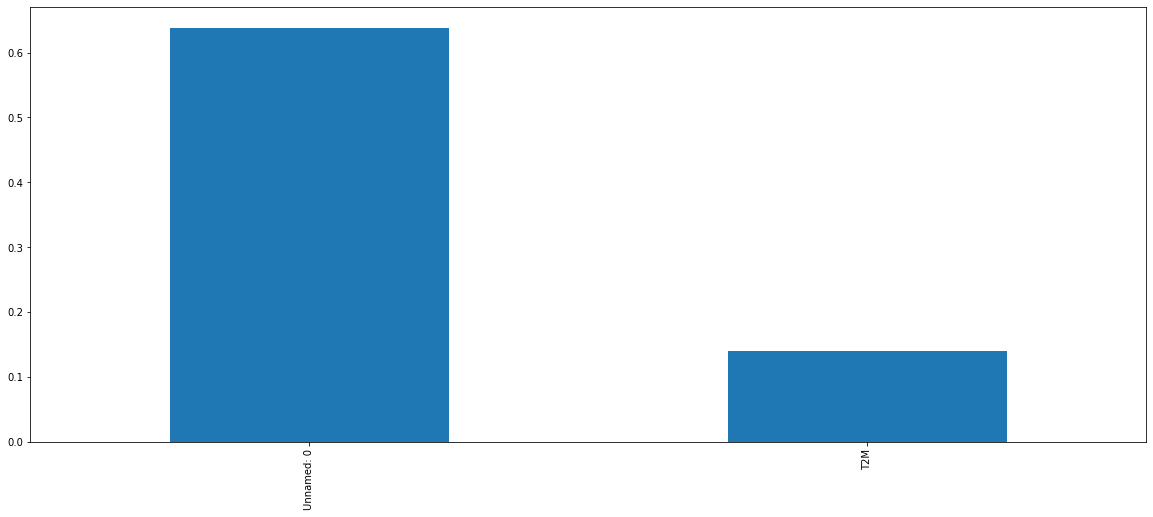

In [8]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [9]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({1.0: 40374, 0.0: 29744})
The number of classes after fit Counter({1.0: 40374, 0.0: 40374})


In [13]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [14]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 7436     0]
 [10094     0]]
0.424187107815174
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.60      7436
         1.0       0.00      0.00      0.00     10094

    accuracy                           0.42     17530
   macro avg       0.21      0.50      0.30     17530
weighted avg       0.18      0.42      0.25     17530



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ajaym\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ajaym\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.5

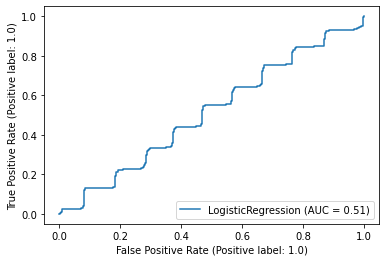

In [15]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [16]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [17]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[6696  740]
 [5021 5073]]
0.6713633770678836
              precision    recall  f1-score   support

         0.0       0.57      0.90      0.70      7436
         1.0       0.87      0.50      0.64     10094

    accuracy                           0.67     17530
   macro avg       0.72      0.70      0.67     17530
weighted avg       0.74      0.67      0.66     17530



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7015299594249771

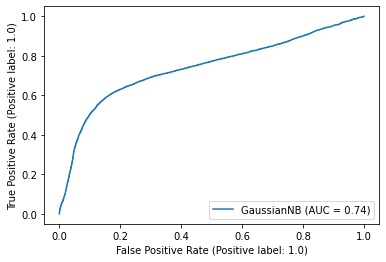

In [18]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[7304  132]
 [ 199 9895]]
0.9811180832857958
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      7436
         1.0       0.99      0.98      0.98     10094

    accuracy                           0.98     17530
   macro avg       0.98      0.98      0.98     17530
weighted avg       0.98      0.98      0.98     17530



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9812669193603792

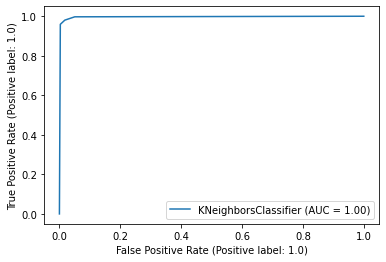

In [33]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[2870 4566]
 [2604 7490]]
0.5909868796349116
              precision    recall  f1-score   support

         0.0       0.52      0.39      0.44      7436
         1.0       0.62      0.74      0.68     10094

    accuracy                           0.59     17530
   macro avg       0.57      0.56      0.56     17530
weighted avg       0.58      0.59      0.58     17530



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.5639925794892188

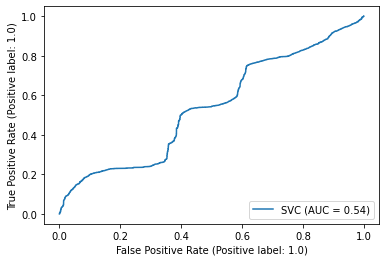

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
import xgboost as xgb


In [27]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

AttributeError: module 'xgboost' has no attribute 'predict'

In [10]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [11]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[6688  748]
 [ 766 9328]]
0.9136337706788363
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      7436
         1.0       0.93      0.92      0.92     10094

    accuracy                           0.91     17530
   macro avg       0.91      0.91      0.91     17530
weighted avg       0.91      0.91      0.91     17530



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9117608093389594

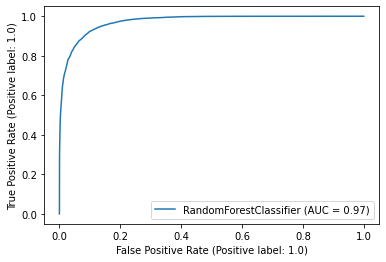

In [12]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [29]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.035582
0:	total: 178ms	remaining: 5m 56s
1:	total: 203ms	remaining: 3m 23s
2:	total: 238ms	remaining: 2m 38s
3:	total: 271ms	remaining: 2m 15s
4:	total: 302ms	remaining: 2m
5:	total: 332ms	remaining: 1m 50s
6:	total: 357ms	remaining: 1m 41s
7:	total: 394ms	remaining: 1m 38s
8:	total: 435ms	remaining: 1m 36s
9:	total: 473ms	remaining: 1m 34s
10:	total: 502ms	remaining: 1m 30s
11:	total: 531ms	remaining: 1m 28s
12:	total: 557ms	remaining: 1m 25s
13:	total: 591ms	remaining: 1m 23s
14:	total: 616ms	remaining: 1m 21s
15:	total: 641ms	remaining: 1m 19s
16:	total: 661ms	remaining: 1m 17s
17:	total: 693ms	remaining: 1m 16s
18:	total: 735ms	remaining: 1m 16s
19:	total: 772ms	remaining: 1m 16s
20:	total: 809ms	remaining: 1m 16s
21:	total: 832ms	remaining: 1m 14s
22:	total: 856ms	remaining: 1m 13s
23:	total: 879ms	remaining: 1m 12s
24:	total: 906ms	remaining: 1m 11s
25:	total: 940ms	remaining: 1m 11s
26:	total: 968ms	remaining: 1m 10s
27:	total: 993ms	remaining: 1m 9s
28:	t

In [30]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6455  981]
 [ 967 9127]]
0.888876212207644
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      7436
         1.0       0.90      0.90      0.90     10094

    accuracy                           0.89     17530
   macro avg       0.89      0.89      0.89     17530
weighted avg       0.89      0.89      0.89     17530



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8861373743081841

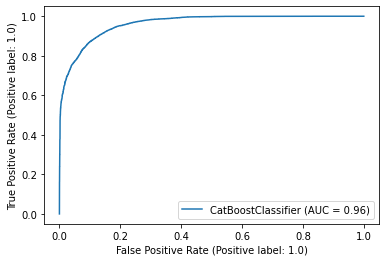

In [31]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [32]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
# joblib.dump(xgb, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']